In [ ]:
from google.colab import files
uploaded = files.upload()

Saving acquire_relevant_sents.csv to acquire_relevant_sents.csv
Saving expansion_relevant_sents.csv to expansion_relevant_sents.csv
Saving scams_relevant_sents.csv to scams_relevant_sents.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_market_events.csv to dataset_market_events.csv


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt # plotting graphs
import sklearn
%matplotlib inline

#Import Regular Expression
import re

import nltk

In [ ]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [ ]:
#Read the Data
acquisition_sentences = pd.read_csv("acquire_relevant_sents.csv")
expansion_sentences = pd.read_csv("expansion_relevant_sents.csv")
governance_sentences = pd.read_csv("scams_relevant_sents.csv")

In [ ]:
#Replacing Column name by Position
acquisition_sentences.rename(columns={ acquisition_sentences.columns[0]: "id" }, inplace = True)
acquisition_sentences = acquisition_sentences.drop(['id'], axis=1)
#Replacing Column name by Position
expansion_sentences.rename(columns={ expansion_sentences.columns[0]: "id" }, inplace = True)
expansion_sentences = expansion_sentences.drop(['id'], axis=1)
#Replacing Column name by Position
governance_sentences.rename(columns={ governance_sentences.columns[0]: "id" }, inplace = True)
governance_sentences = governance_sentences.drop(['id'], axis=1)

print('acquisition_sentences: ', len(acquisition_sentences))
print('expansion_sentences: ', len(expansion_sentences))
print('governance_sentences: ', len(governance_sentences))

acquisition_sentences:  18234
expansion_sentences:  11197
governance_sentences:  11033


In [ ]:
acquisition_sentences.drop_duplicates(keep=False,inplace=True)
print('acquisition_sentences: ', len(acquisition_sentences))

acquisition_sentences:  17847


In [ ]:
acquisition_sentences.head()

,ticker,sector,cik,filing_type,filing_date,filing_section,file_sentences,cosine_score,label
0,DISCA,Communication Services,1437107,10K,20141231,Item1A,"engaging in a merger, consolidation or other business combination with any other entity; and",0.701766,acquire
1,DISCA,Communication Services,1437107,10K,20151231,Item1A,"engaging in a merger, consolidation or other business combination with any other entity; and",0.701766,acquire
2,DISCA,Communication Services,1437107,10K,20161231,Item1A,"engaging in a merger, consolidation or other business combination with any other entity; and",0.701766,acquire
3,DISCA,Communication Services,1437107,10K,20171231,Item1A,"engaging in a merger, consolidation or other business combination with any other entity; and",0.701766,acquire
4,DISCA,Communication Services,1437107,10K,20181231,Item1A,"engaging in a merger, consolidation or other business combination with any other entity; and",0.701766,acquire


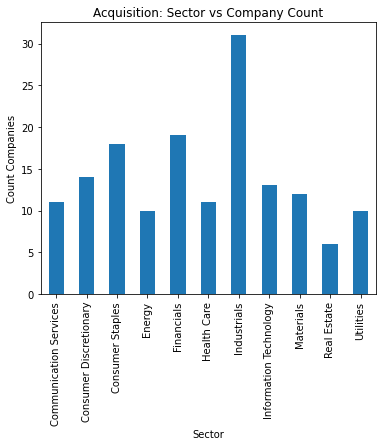

In [ ]:
dfg_acquision = acquisition_sentences.groupby(['sector'])['ticker'].nunique()
# dfg.head()
dfg_acquision.plot(kind='bar', title='Acquisition: Sector vs Company Count', ylabel='Count Companies',
         xlabel='Sector', figsize=(6, 5))

In [ ]:
acquisition_sentences_unique = acquisition_sentences[['file_sentences', 'label']].drop_duplicates(keep=False)

In [ ]:
len(acquisition_sentences_unique)

5335

In [ ]:
acquisition_sentences_unique.head()

,file_sentences,label
7,"Mergers and Acquisitions - We continue to evaluate and, where appropriate, act upon attractive acquisition candidates to accelerate our growth, including into adjacent markets.",acquire
13,"Acquisitions or joint ventures that are not successfully completed, integrated into our existing operations or managed effectively, or divestitures or refranchisings that are not successfully completed or managed",acquire
27,"realizing the anticipated financial benefits from these acquisitions and where necessary, improving internal controls of these acquired businesses;",acquire
46,"Significant acquisitions, dispositions or strategic alliances by us or by competitors;",acquire
47,"consolidate or merge with or into, or sell substantially all of our assets to another entity.",acquire


In [ ]:
expansion_sentences.drop_duplicates(keep=False,inplace=True)
print('expansion_sentences: ', len(expansion_sentences))

expansion_sentences:  10958


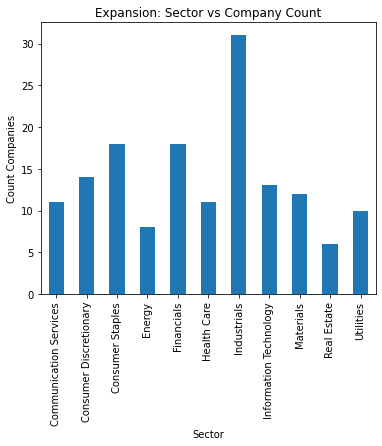

In [ ]:
dfg_expansion = expansion_sentences.groupby(['sector'])['ticker'].nunique()
# dfg.head()
dfg_expansion.plot(kind='bar', title='Expansion: Sector vs Company Count', ylabel='Count Companies',
         xlabel='Sector', figsize=(6, 5))

In [ ]:
expansion_sentences_unique = expansion_sentences[['file_sentences', 'label']].drop_duplicates(keep=False)

In [ ]:
len(expansion_sentences_unique)

3977

In [ ]:
expansion_sentences_unique.head()

,file_sentences,label
0,"We continue to focus on technology initiatives, including:",expansion
24,"Introduction of new products, including products with price-performance advantages, and new business models including the transformation of our business to deliver more software and subscription offerings",expansion
49,"announcements by us or our competitors of significant new business awards or technologies, product and service offerings;",expansion
52,"new competitive product releases and updates to existing products, especially cloud-based products;",expansion
53,"Innovation in design, product offerings and new categories.",expansion


In [ ]:
governance_sentences.drop_duplicates(keep=False,inplace=True)
print('governance_sentences: ', len(governance_sentences))

governance_sentences:  10816


In [ ]:
governance_sentences_unique = governance_sentences[['file_sentences', 'label']].drop_duplicates(keep=False)

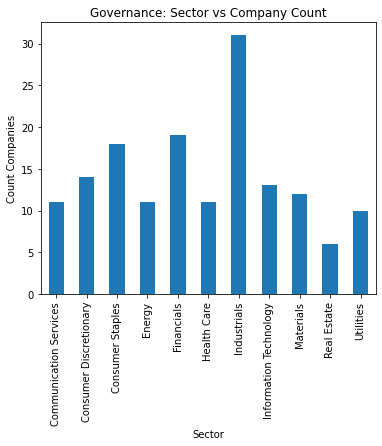

In [ ]:
dfg_governance = governance_sentences.groupby(['sector'])['ticker'].nunique()
# dfg.head()
dfg_governance.plot(kind='bar', title='Governance: Sector vs Company Count', ylabel='Count Companies',
         xlabel='Sector', figsize=(6, 5))

In [ ]:
len(governance_sentences_unique)

2602

In [ ]:
governance_sentences_unique.head()

,file_sentences,label
7,"Our business is subject to product liability, false advertising and consumer fraud claims.",scams
22,"widespread claim costs associated with property, workers compensation, accident and health, business interruption and mortality and morbidity claims;",scams
29,"claims related to data and network security breaches, information system failures or cyber attacks;",scams
32,"Other laws that could subject us to claims or otherwise harm our business include, among others:",scams
43,these and similar lawsuits in the future.,scams


In [ ]:
def word_count(string):
    return(len(string.strip().split(" ")))

In [ ]:
acquisition_sentences_unique['word_count'] = acquisition_sentences_unique.apply(lambda row : word_count(row['file_sentences']), axis = 1)

In [ ]:
acquisition_sentences_unique['word_count'].max()

962

In [ ]:
acquisition_sentences_unique = acquisition_sentences_unique[(acquisition_sentences_unique['word_count']>= 6) & (acquisition_sentences_unique['word_count']<= 400)]
print(len(acquisition_sentences_unique))

5302


In [ ]:
governance_sentences_unique['word_count'] = governance_sentences_unique.apply(lambda row : word_count(row['file_sentences']), axis = 1)

In [ ]:
governance_sentences_unique = governance_sentences_unique[(governance_sentences_unique['word_count']>= 6) & (governance_sentences_unique['word_count']<= 400)]
print(len(governance_sentences_unique))

2575


In [ ]:
expansion_sentences_unique['word_count'] = expansion_sentences_unique.apply(lambda row : word_count(row['file_sentences']), axis = 1)

In [ ]:
expansion_sentences_unique = expansion_sentences_unique[(expansion_sentences_unique['word_count']>= 6) & (expansion_sentences_unique['word_count']<= 600)]
print(len(expansion_sentences_unique))

3969


In [ ]:
expansion_sentences_unique.head()

,file_sentences,label,word_count
0,"We continue to focus on technology initiatives, including:",expansion,8
24,"Introduction of new products, including products with price-performance advantages, and new business models including the transformation of our business to deliver more software and subscription offerings",expansion,26
49,"announcements by us or our competitors of significant new business awards or technologies, product and service offerings;",expansion,17
52,"new competitive product releases and updates to existing products, especially cloud-based products;",expansion,12
53,"Innovation in design, product offerings and new categories.",expansion,8


In [ ]:
acquisition_sentences_unique['word_count'].mean()

67.6397585816673

In [ ]:
governance_sentences_unique['word_count'].mean()

62.90563106796117

In [ ]:
expansion_sentences_unique['word_count'].mean()

49.46384479717813

In [ ]:
df_final = pd.concat([acquisition_sentences_unique,expansion_sentences_unique,governance_sentences_unique])

In [ ]:
df_final.shape


(11846, 3)

In [ ]:
df_final['label'].value_counts()

acquire      5302
expansion    3969
scams        2575
Name: label, dtype: int64

In [ ]:
df_final['file_sentences'].duplicated(keep=False).sum()

4924

In [ ]:
df_final.loc[df_final['file_sentences'].duplicated(keep=False),:]

,file_sentences,label,word_count
7,"Mergers and Acquisitions - We continue to evaluate and, where appropriate, act upon attractive acquisition candidates to accelerate our growth, including into adjacent markets.",acquire,24
13,"Acquisitions or joint ventures that are not successfully completed, integrated into our existing operations or managed effectively, or divestitures or refranchisings that are not successfully completed or managed",acquire,28
27,"realizing the anticipated financial benefits from these acquisitions and where necessary, improving internal controls of these acquired businesses;",acquire,18
46,"Significant acquisitions, dispositions or strategic alliances by us or by competitors;",acquire,11
47,"consolidate or merge with or into, or sell substantially all of our assets to another entity.",acquire,16
...,...,...,...
10993,"* Acquisitions, strategic alliances, divestitures, and other unusual events resulting from portfolio management actions and other evolving business strategies, and possible organizational restructuring could affect future results. The",scams,28
10994,We operate and report financial and operating information in the following three operating segments:,scams,14
10998,"We recently implemented restructuring programs, which could have a material negative impact on our business.",scams,15
11000,"acquisition targets that meet its criteria for quality, value, and return on investment;",scams,13


In [ ]:
df_final1= df_final.drop_duplicates(subset=['file_sentences'],keep=False)

In [ ]:
len(df_final1)

6922

In [ ]:
df_final1.head()

,file_sentences,label,word_count
101,and scope. The proposed mergers of the LSE with Deutsche Brse A.G. and of CBOE with BATS are two current examples of pending consolidation among marketplaces.,acquire,26
141,"We must rationalize, coordinate and integrate the operations of our acquired businesses. This process involves complex technological, operational and personnel-related challenges, which are time-consuming and expensive and may disrupt our business. The difficulties, costs and delays that could be encountered may include:",acquire,42
230,"the effect of the announcement of the Proposed Merger Transactions on each companys ability to retain and hire key personnel, maintain business relationships, and on operating results and the businesses generally;",acquire,31
300,"For example, among department stores and other national retailers often referred to as big box stores corporate merger or consolidation activity typically results in the closure of duplicate or geographically overlapping store",acquire,32
301,restrict the combined companys ability to make strategic acquisitions or dispositions or to exploit business opportunities;,acquire,16


In [ ]:
df_final1.to_csv('dataset_market_events.csv')

In [ ]:
df_final1['label'].value_counts()

acquire      3093
expansion    2267
scams        1562
Name: label, dtype: int64

In [ ]:
acquisition_train = pd.merge(acquisition_sentences, acquisition_sentences_unique, left_index=True, right_index=True)

In [ ]:
acquisition_train.head(1)

,ticker,sector,cik,filing_type,filing_date,filing_section,file_sentences_x,cosine_score,label_x,file_sentences_y,label_y,word_count
7,XYL,Industrials,1524472,10K,20191231,Item1,"Mergers and Acquisitions - We continue to evaluate and, where appropriate, act upon attractive acquisition candidates to accelerate our growth, including into adjacent markets.",0.673886,acquire,"Mergers and Acquisitions - We continue to evaluate and, where appropriate, act upon attractive acquisition candidates to accelerate our growth, including into adjacent markets.",acquire,24


In [ ]:
acquisition_train.groupby(['label_y','sector'])['file_sentences_y'].nunique()

label_y  sector                
acquire  Communication Services    337
         Consumer Discretionary    518
         Consumer Staples          492
         Energy                    230
         Financials                866
         Health Care               558
         Industrials               788
         Information Technology    613
         Materials                 398
         Real Estate               251
         Utilities                 251
Name: file_sentences_y, dtype: int64

In [ ]:
acquisition_train_avg_sents = acquisition_train.groupby(['label_y','sector', 'cik'])['file_sentences_y'].nunique().to_frame('sents_count').reset_index()

In [ ]:
acquisition_train_avg_sents.groupby(['sector'])['sents_count'].mean()

sector
Communication Services    25.923077
Consumer Discretionary    37.000000
Consumer Staples          27.333333
Energy                    23.000000
Financials                45.578947
Health Care               50.727273
Industrials               25.419355
Information Technology    47.153846
Materials                 33.166667
Real Estate               35.857143
Utilities                 25.100000
Name: sents_count, dtype: float64

In [ ]:
expansion_train = pd.merge(expansion_sentences, expansion_sentences_unique, left_index=True, right_index=True)

In [ ]:
expansion_train.head(1)

,ticker,sector,cik,filing_type,filing_date,filing_section,file_sentences_x,cosine_score,label_x,file_sentences_y,label_y,word_count
0,CMCSA,Communication Services,902739,10K,20161231,Item1,"We continue to focus on technology initiatives, including:",0.653471,expansion,"We continue to focus on technology initiatives, including:",expansion,8


In [ ]:
expansion_train.groupby(['label_y','sector'])['file_sentences_y'].nunique()

label_y    sector                
expansion  Communication Services    563
           Consumer Discretionary    716
           Consumer Staples          291
           Energy                    122
           Financials                357
           Health Care               383
           Industrials               464
           Information Technology    555
           Materials                 256
           Real Estate               129
           Utilities                 133
Name: file_sentences_y, dtype: int64

In [ ]:
expansion_train_avg_sents = expansion_train.groupby(['label_y','sector', 'cik'])['file_sentences_y'].nunique().to_frame('sents_count').reset_index()

In [ ]:
expansion_train_avg_sents.groupby(['sector'])['sents_count'].mean()

sector
Communication Services    43.307692
Consumer Discretionary    51.142857
Consumer Staples          16.166667
Energy                    15.250000
Financials                21.000000
Health Care               34.818182
Industrials               14.967742
Information Technology    42.692308
Materials                 21.333333
Real Estate               18.428571
Utilities                 13.300000
Name: sents_count, dtype: float64

In [ ]:
governance_train = pd.merge(governance_sentences, governance_sentences_unique, left_index=True, right_index=True)

In [ ]:
governance_train.head(1)

,ticker,sector,cik,filing_type,filing_date,filing_section,file_sentences_x,cosine_score,label_x,file_sentences_y,label_y,word_count
7,CL,Consumer Staples,21665,10K,20141231,Item1A,"Our business is subject to product liability, false advertising and consumer fraud claims.",0.584207,scams,"Our business is subject to product liability, false advertising and consumer fraud claims.",scams,13


In [ ]:
governance_train.groupby(['label_y','sector'])['file_sentences_y'].nunique()

label_y  sector                
scams    Communication Services    185
         Consumer Discretionary    156
         Consumer Staples          192
         Energy                    103
         Financials                729
         Health Care               249
         Industrials               313
         Information Technology    302
         Materials                 148
         Real Estate               75 
         Utilities                 123
Name: file_sentences_y, dtype: int64

In [ ]:
governance_train_avg_sents = governance_train.groupby(['label_y','sector', 'cik'])['file_sentences_y'].nunique().to_frame('sents_count').reset_index()

In [ ]:
governance_train_avg_sents.groupby(['sector'])['sents_count'].mean()

sector
Communication Services    14.230769
Consumer Discretionary    11.142857
Consumer Staples          10.666667
Energy                    10.300000
Financials                38.368421
Health Care               22.636364
Industrials               10.433333
Information Technology    23.230769
Materials                 12.333333
Real Estate               10.714286
Utilities                 12.300000
Name: sents_count, dtype: float64

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df_final1 = pd.read_csv("dataset_market_events.csv")

In [ ]:
#print 10 sentences for each tag

In [ ]:
df_final1[df_final1['label']=='acquire']['file_sentences'].head(5).values

array(['the potential impact of the Proposed Merger Transactions on the stock price of the Company, and the dividends expected to be paid to Company stockholders in the future; ',
       'and scope. The proposed mergers of the LSE with Deutsche Brse A.G. and of CBOE with BATS are two current examples of pending consolidation among marketplaces. ',
       'In addition, we have undertaken a number of additional acquisitions, divestitures, and strategic initiatives in recent years designed to grow our businesses and enhance our competitive position. Please refer to MD&A in Part II, Item 7 below and Note 3, Restructuring, Note 5, Equity Method Investments and Note 7, Acquisitions to the Consolidated Financial Statements included in Part II, Item 8 below for additional information. ',
       'In addition, we have undertaken a number of additional acquisitions, divestitures, and strategic initiatives in recent years designed to grow our businesses and enhance our competitive position. These 

In [ ]:
df_final1[df_final1['label']=='scams']['file_sentences'].head(5).values

array(['Our business is subject to product liability, false advertising and consumer fraud claims. ',
       ' claims related to data and network security breaches, information system failures or cyber attacks; ',
       'Other laws that could subject us to claims or otherwise harm our business include, among others: ',
       ' these and similar lawsuits in the future. ',
       'risks related to legal proceedings, investigations or claims; '],
      dtype=object)

In [ ]:
df_final1[df_final1['label']=='expansion']['file_sentences'].head(5).values

array(['We continue to develop and enhance our video platform to maintain driving engagement and improving the customer experience. ',
       'In 2016, the Company announced that as part of its strategy to increase emphasis on specialty businesses and products: ',
       'We also offer features designed to improve our platform capabilities, such as: ',
       'developing and producing innovative, high-quality products in sizes, colors, and styles that appeal to consumers; ',
       'delays in our introduction of new products and services; '],
      dtype=object)

In [ ]:
df_final1['label'].value_counts()

acquire      4081
scams        1634
expansion     556
Name: label, dtype: int64

In [ ]:
# convert target label to numerical

In [ ]:
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'label'.
df_final1['labelid']= label_encoder.fit_transform(df_final1['label'])
 
# df_final['labelid'].unique()

df_final1['labelid'] = df_final1['labelid'].astype('category')

# df_final.dtypes
#select only the sentences and labels
df_final2 = df_final1[['file_sentences','label', 'labelid']]


In [ ]:
df_final1['file_sentences'].duplicated().sum()

0

In [ ]:
df_final2.head()

,file_sentences,label,labelid
0,the potential impact of the Proposed Merger Tr...,acquire,0
1,and scope. The proposed mergers of the LSE wit...,acquire,0
2,"In addition, we have undertaken a number of ad...",acquire,0
3,"In addition, we have undertaken a number of ad...",acquire,0
4,"We must rationalize, coordinate and integrate...",acquire,0


In [ ]:
df_final2.shape

(6271, 3)

In [ ]:
# Create a new pandas dataframe "category_id_df", which only has unique Categories, also sorting this list in order of category_id values
label_id_df  = df_final2[['label', 'labelid']].drop_duplicates().sort_values('labelid')

# Create a dictionary ( python datastructure - like a lookup table) that 
# can easily convert category names into category_ids and vice-versa
label_to_id = dict(label_id_df.values)
id_to_label = dict(label_id_df[['labelid', 'label']].values)
# print(id_to_label)

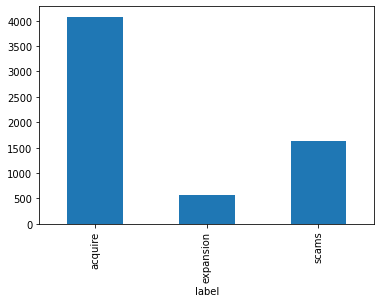

In [ ]:
#Plot the distribution of articles by category
df_final2.groupby('label').labelid.count().plot.bar(ylim=0)

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2',max_features=5000, encoding='latin-1',ngram_range=(2, 3), stop_words='english')

features = tfidf.fit_transform(df_final2.file_sentences).toarray()
labels = df_final2.labelid

In [ ]:
#Get a feel of the features identified by tfidf
features.shape # How many features are there ? 

(6271, 5000)

In [ ]:
# Remember the dictionary created to map category names to a number ? 
label_to_id.items()

dict_items([('acquire', 0), ('expansion', 1), ('scams', 2)])

In [ ]:
# The sorted function Converts dictionary items into a (sorted) list. 
# In subsequent steps - We will use this list to iterate over the categories
sorted(label_to_id.items())

[('acquire', 0), ('expansion', 1), ('scams', 2)]

In [ ]:
# Use chi-square analysis to find corelation between features (importantce of words) and labels(news category) 

N = 3  # We are going to look for top 3 categories

#For each category, find words that are highly corelated to it
for label, labelid in sorted(label_to_id.items()):
  features_chi2 = chi2(features, labels == labelid)                   # Do chi2 analyses of all items in this category
  indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
  feature_names = np.array(tfidf.get_feature_names())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
  # unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          # List for two-word features ( in increasing order of chi-squared stat values)
  trigrams = [v for v in feature_names if len(v.split(' ')) == 3]          # List for 3-word features ( in increasing order of chi-squared stat values)
  print("# '{}':".format(label))
  # print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'acquire':
  . Most correlated bigrams:
       . property rights
       . legal proceedings
       . intellectual property
# 'expansion':
  . Most correlated bigrams:
       . annual report
       . calvin klein
       . star wars
# 'scams':
  . Most correlated bigrams:
       . property rights
       . legal proceedings
       . intellectual property


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
features_chi2

(array([0.69527239, 0.69527239, 5.62572347, ..., 0.49835596, 0.00648769,
        3.58330102]),
 array([0.40437682, 0.40437682, 0.01769876, ..., 0.48022339, 0.93580286,
        0.05836307]))

In [ ]:
from sklearn.manifold import TSNE

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)          # Randomly select 30 % of samples
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) # Array of all projected features of 30% of Randomly chosen samples

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
type(projected_features)

numpy.ndarray

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
# SVC = sklearn.svm.SVC()

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=500, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    svm.SVC(kernel='linear',gamma='auto', class_weight='balanced', probability=False)
]

In [ ]:
CV = 5  # Cross Validate with 5 different folds of 20% data ( 80-20 split with 5 folds )

#Create a data frame that will store the results for all 5 trials of the 3 different models
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] # Initially all entries are empty

In [ ]:
!pip install tqdm

In [ ]:
from tqdm import tqdm
import time

In [ ]:
#For each Algorithm 
for model in tqdm(models, desc = 'Progress Bar'):
    model_name = model.__class__.__name__
    print(model)
    print('1')
    # create 5 models with different 20% test sets, and store their accuracies
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    # Append all 5 accuracies into the entries list ( after all 3 models are run, there will be 3x5 = 15 entries)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

Progress Bar:   0%|          | 0/4 [00:00<?, ?it/s]

RandomForestClassifier(n_estimators=500, random_state=0)
1


Progress Bar:  25%|██▌       | 1/4 [09:17<27:53, 557.73s/it]

MultinomialNB()
1


Progress Bar:  50%|█████     | 2/4 [09:18<07:40, 230.14s/it]

LogisticRegression(random_state=0)
1


Progress Bar:  75%|███████▌  | 3/4 [10:10<02:28, 148.85s/it]

SVC(class_weight='balanced', gamma='auto', kernel='linear')
1


Progress Bar: 100%|██████████| 4/4 [20:03<00:00, 300.92s/it]


In [ ]:
# Store the entries into the results dataframe and name its columns    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.835060
1,RandomForestClassifier,1,0.800638
2,RandomForestClassifier,2,0.795853
3,RandomForestClassifier,3,0.771132
4,RandomForestClassifier,4,0.744817
5,MultinomialNB,0,0.840637
6,MultinomialNB,1,0.803828
7,MultinomialNB,2,0.793461
8,MultinomialNB,3,0.791866
9,MultinomialNB,4,0.759171


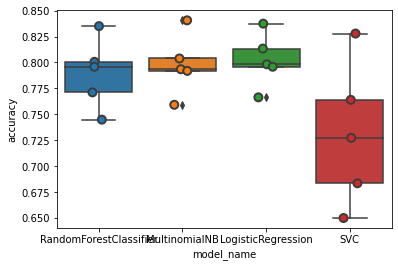

In [ ]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [ ]:
# Mean accuracy of each algorithm
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.802259
MultinomialNB             0.797793
RandomForestClassifier    0.789500
SVC                       0.730490
Name: accuracy, dtype: float64

SVC model building

In [ ]:
from sklearn.model_selection import train_test_split


#Split Data 
X_train, X_test, y_train, y_test = train_test_split(features, labels,stratify=labels, test_size=0.20, random_state=0)


model_SVC = svm.SVC(random_state=0, kernel='linear',gamma='auto', class_weight='balanced', probability=False)

#Train Algorithm
model_SVC.fit(X_train, y_train)

# Make Predictions
# y_pred_proba = model.predict_proba(X_test)
y_pred = model_SVC.predict(X_test)

Text(0.5, 15.0, 'Predicted')

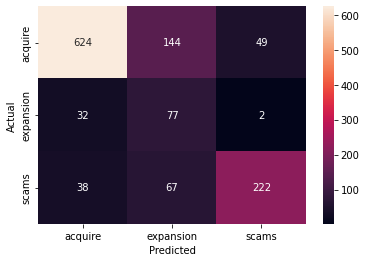

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=label_id_df.label.values, yticklabels=label_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
model_SVC.fit(features, labels)

SVC(class_weight='balanced', gamma='auto', kernel='linear', random_state=0)

In [ ]:
# model.coef_ contains the importance of each feature for each category
model_SVC.coef_

array([[-0.79079791,  0.19011881, -0.33936081, ..., -0.34345124,
        -0.30899669,  0.14561746],
       [ 0.10198343, -0.63916758,  0.43184952, ...,  0.        ,
        -0.26347267,  0.35185602],
       [ 0.32212021, -0.73132743,  0.52544836, ...,  0.0998566 ,
         0.02924546,  0.        ]])

In [ ]:
from sklearn import metrics

In [ ]:
# Print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[624 144  49]
 [ 32  77   2]
 [ 38  67 222]]


In [ ]:

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred, digits=3, target_names= label_id_df.label.values))

              precision    recall  f1-score   support

     acquire      0.899     0.764     0.826       817
   expansion      0.267     0.694     0.386       111
       scams      0.813     0.679     0.740       327

    accuracy                          0.735      1255
   macro avg      0.660     0.712     0.651      1255
weighted avg      0.821     0.735     0.765      1255



LogisticRegression model building

In [ ]:
model_LR = LogisticRegression(multi_class='multinomial', solver='lbfgs',class_weight='balanced', random_state=11)
#Train Algorithm
model_LR.fit(X_train, y_train)

# Make Predictions
# y_pred_proba = model.predict_proba(X_test)
y_pred_LR = model_LR.predict(X_test)

In [ ]:
# Print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_LR))

[[619 141  57]
 [ 36  73   2]
 [ 37  65 225]]


Text(0.5, 15.0, 'Predicted')

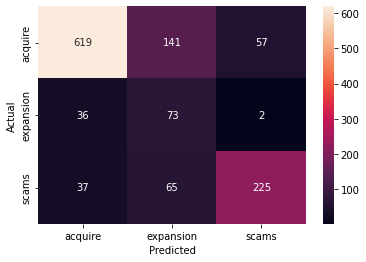

In [ ]:
conf_mat_LR = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(conf_mat_LR, annot=True, fmt='d',
            xticklabels=label_id_df.label.values, yticklabels=label_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
print(metrics.classification_report(y_test, y_pred_LR, digits=3, target_names=label_id_df.label.values))

              precision    recall  f1-score   support

     acquire      0.895     0.758     0.820       817
   expansion      0.262     0.658     0.374       111
       scams      0.792     0.688     0.736       327

    accuracy                          0.731      1255
   macro avg      0.649     0.701     0.644      1255
weighted avg      0.812     0.731     0.759      1255



Random Forest model building

In [ ]:
model_RF = RandomForestClassifier(n_estimators=1000, class_weight='balanced', random_state=111)
#Train Algorithm
model_RF.fit(X_train, y_train)

# Make Predictions
# y_pred_proba = model.predict_proba(X_test)
y_pred_RF = model_RF.predict(X_test)

In [ ]:
# Print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_RF))

[[670 112  35]
 [ 44  62   5]
 [ 49  69 209]]


Text(0.5, 15.0, 'Predicted')

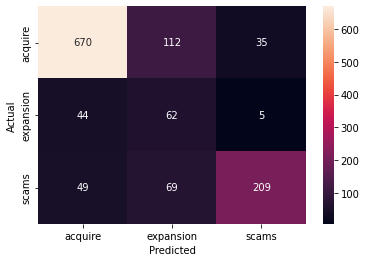

In [ ]:
conf_mat_RF = confusion_matrix(y_test, y_pred_RF)
# conf_mat
sns.heatmap(conf_mat_RF, annot=True, fmt='d',
            xticklabels=label_id_df.label.values, yticklabels=label_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
print(metrics.classification_report(y_test, y_pred_RF, digits=3, target_names=label_id_df.label.values))

              precision    recall  f1-score   support

     acquire      0.878     0.820     0.848       817
   expansion      0.255     0.559     0.350       111
       scams      0.839     0.639     0.726       327

    accuracy                          0.750      1255
   macro avg      0.658     0.673     0.641      1255
weighted avg      0.813     0.750     0.772      1255



MultinomialNB model building

In [ ]:
model_MNB = MultinomialNB()
#Train Algorithm
model_MNB.fit(X_train, y_train)

# Make Predictions
y_pred_MNB = model_MNB.predict(X_test)

In [ ]:
# Print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_MNB))

[[787   5  25]
 [108   0   3]
 [126   1 200]]


Text(0.5, 15.0, 'Predicted')

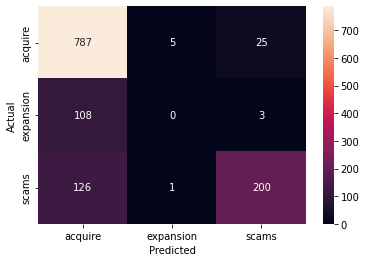

In [ ]:
conf_mat_MNB = confusion_matrix(y_test, y_pred_MNB)
# conf_mat
sns.heatmap(conf_mat_MNB, annot=True, fmt='d',
            xticklabels=label_id_df.label.values, yticklabels=label_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
print(metrics.classification_report(y_test, y_pred_MNB, digits=3, target_names=label_id_df.label.values))

              precision    recall  f1-score   support

     acquire      0.771     0.963     0.856       817
   expansion      0.000     0.000     0.000       111
       scams      0.877     0.612     0.721       327

    accuracy                          0.786      1255
   macro avg      0.549     0.525     0.526      1255
weighted avg      0.730     0.786     0.745      1255



Test


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_market_events_test.csv to dataset_market_events_test.csv


In [ ]:
df_final1_test = pd.read_csv('dataset_market_events_test.csv', index_col=[0])

In [ ]:
df_final1_test.head(1)

,file_sentences,label,word_count
74,"the scope, nature, impact or timing of acquisi...",acquire,37


In [ ]:
df_final1_test['file_sentences'].duplicated().sum()

0

In [ ]:
# label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'label'.
# df_final1_test['labelid']= label_encoder.fit_transform(df_final1_test['label'])
df_final1_test['labelid']= label_encoder.transform(df_final1_test['label'])
 
# df_final['labelid'].unique()

df_final1_test['labelid'] = df_final1_test['labelid'].astype('category')

# df_final.dtypes
#select only the sentences and labels
df_final2_test = df_final1_test[['file_sentences','label', 'labelid']]


In [ ]:
df_final2_test.head(1)

,file_sentences,label,labelid
74,"the scope, nature, impact or timing of acquisi...",acquire,0


In [ ]:
features_test = tfidf.transform(df_final2_test.file_sentences).toarray()
labels_test = df_final2_test.labelid

In [ ]:
features_test.shape

(2410, 5000)

In [ ]:
# Create a new pandas dataframe "category_id_df", which only has unique Categories, also sorting this list in order of category_id values
label_id_df_test  = df_final2_test[['label', 'labelid']].drop_duplicates().sort_values('labelid')

# Create a dictionary ( python datastructure - like a lookup table) that 
# can easily convert category names into category_ids and vice-versa
label_to_id_test = dict(label_id_df_test.values)
id_to_label_test = dict(label_id_df_test[['labelid', 'label']].values)


SVC Model Test prediction

In [ ]:
y_pred_SVC = model_SVC.predict(features_test)

Text(0.5, 15.0, 'Predicted')

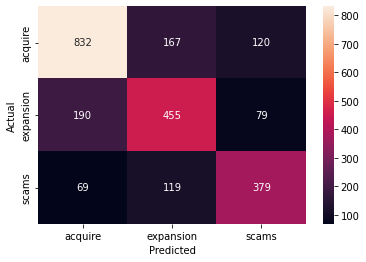

In [ ]:
conf_mat_SVC = confusion_matrix(labels_test, y_pred_SVC)
sns.heatmap(conf_mat_SVC, annot=True, fmt='d',
            xticklabels=label_id_df_test.label.values, yticklabels=label_id_df_test.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
print(metrics.classification_report(labels_test, y_pred_SVC, digits=3, target_names=label_id_df_test.label.values))

              precision    recall  f1-score   support

     acquire      0.763     0.744     0.753      1119
   expansion      0.614     0.628     0.621       724
       scams      0.656     0.668     0.662       567

    accuracy                          0.691      2410
   macro avg      0.677     0.680     0.679      2410
weighted avg      0.693     0.691     0.692      2410



In [ ]:
df_final2_test_SVC = df_final2_test

In [ ]:
df_final2_test_SVC['pred_labelid'] = y_pred_SVC


In [ ]:
df_final2_test_SVC[(df_final2_test_SVC['labelid']==1) & (df_final2_test_SVC['pred_labelid']==1)]

,file_sentences,label,labelid,pred_labelid
121,"Expanding audience reach. Building on our strong established franchises and creating new franchises through compelling new content is at the core of our business. We endeavor to reach as many consumers as possible by offering our content on multiple platforms and delivering compelling experiences across multiple business models (e.g. premium, free-to-play, subscription-based, etc.).",expansion,1,1
467,"Expanding audience reach. Building on our strong established franchises and creating new franchises through compelling new content is at the core of our business. We endeavor to reach as many consumers as possible either through: (1) the purchase of our content and services; (2) engagement in our free-to-play games, which allow consumers to play games with no up-front cost but provide for player investment through sales of downloadable content or via microtransactions; or (3) engagement in other types of media based on our franchises, such as esports.",expansion,1,1
494,"launched a Company-wide teammate survey on diversity, inclusion, and belonging that allows us to gather baseline metrics;",expansion,1,1
519,"Focus on Delivery of Digital Content and Online Services. We continue to shift towards digital delivery of content and to establish and develop direct and long-term relationships with our gamers. We will also continue to support, maintain and enhance the online communities for our games and franchises, such as the World of Warcraft and Call of Duty online communities. We believe that focusing our efforts on online product innovations, such as additional online content, services and social connectivity, provides lasting value to our global communities of players. In addition, we are expanding into new business models for the digital delivery of content, including offering free-to-play games with monetization through in-game microtransactions, as well as increasing our presence on new digital platforms, such as mobile and tablet devices.",expansion,1,1
540,"Expanding audience reach. Building on our strong established franchises and creating new franchises through compelling new content is at the core of our business. Our employees, technology, and institutionalized processes allow us to continue to deliver high-quality content that expands our reach. We endeavor to reach as many consumers as possible either through: (1) the purchase of our content and services; (2) engagement in our free-to-play games, which allow consumers to play games with no up-front cost but are instead monetized through sales of downloadable content or via microtransactions; or (3) engagement in other types of media based on our franchises.",expansion,1,1
862,"The Company is committed to bringing the best user experience to its customers through its innovative hardware, software and services. The Companys business strategy leverages its unique ability to design and develop its own operating systems, hardware, application software and services to provide its customers products and solutions with innovative design, superior ease-of-use and seamless integration. As part of its strategy, the Company continues to expand its platform for the discovery and delivery of digital content and applications through its Digital Content and Services, which allows customers to discover and download or stream digital content, iOS, Mac, Apple Watch and Apple TV applications, and books through either a Mac or Windows personal computer or through iPhone, iPad and iPod touch devices (iOS devices), Apple TV, Apple Watch and HomePod. The Company also supports a community for the development of third-party software and hardware products and digital content that complement the Companys offerings. The Company believes a high-quality buying experience with knowledgeable salespersons who can convey the value of the Companys products and services greatly enhances its ability to attract and retain customers. Therefore, the Companys str

In [ ]:
df_final2_test_SVC[(df_final2_test_SVC['labelid']==0) & (df_final2_test_SVC['pred_labelid']==0)]

,file_sentences,label,labelid,pred_labelid
74,"the scope, nature, impact or timing of acquisition and divestiture activity, including among other things integration of acquired businesses into existing businesses and realization of synergies and opportunities for growth and innovation and incurrence of related costs;",acquire,0,0
75,"As part of our strategy to realign our business portfolio, we completed several acquisitions in 2015, 2014 and 2013 and may pursue additional acquisitions in the future. Our integration of acquired businesses requires significant efforts, including corporate restructuring, the coordination of information technologies, research and development, sales and marketing, operations, supply chain, manufacturing, quality systems and finance. These efforts result in additional expenses and involve significant management time. Some of the factors that could affect the success of our acquisitions include, among others, our ability to execute our business plan for the acquired companies, the strength of the acquired technology, results of clinical trials, regulatory approvals and",acquire,0,0
86,"As part of our strategy to realign our business portfolio, we have completed multiple acquisitions over the past three years and may pursue additional acquisitions in the future. Our integration of acquired businesses requires significant efforts, including corporate restructuring and the coordination of information technologies, research and development, sales and marketing, operations, regulatory, supply chain, manufacturing, quality systems and finance. These efforts result in additional expenses and involve significant management time. Some of the factors that could affect the success of our acquisitions include, among others, the effectiveness of our due diligence process, our ability to execute our business plan for the acquired companies, the strength of the acquired technology, results of clinical trials, regulatory approvals and reimbursement levels of the acquired products and related procedures, the continued performance of critical transition services, our ability to adequately fund acquired in-process",acquire,0,0
90,"As part of our strategy to realign our business portfolio, we completed several acquisitions in 2017, 2016 and 2015 and may pursue additional acquisitions in the future. Our integration of acquired businesses requires significant efforts, including corporate restructuring, the coordination of information technologies, research and development, sales and marketing, operations, regulatory, supply chain, manufacturing, quality systems and finance. These efforts result in additional expenses and involve significant management time. Some of the factors that could affect the success of our acquisitions include, among others, the effectiveness of our due diligence process, our ability to execute our business plan for the acquired companies, the strength of the acquired technology, results of clinical trials, regulatory approvals and reimbursement levels of the acquired products and related procedures,",acquire,0,0
125,"certain purchase accounting adjustments that we expect will be recorded in our financial statements in connection with any merger, acquisition or strategic partnership;",acquire,0,0
...,...,...,...,...
6947,integration and optimization of the entire production system over the life of the field by leveraging flow control expertise and process technologies with petrotechnical expertise and reservoir and production technologies.,acquire,0,0
6948,Synergy Benefits The failure to realize the anticipated benefits of the acquisition of Bemis.,acquire,0,0
6950,"The software industry is characterized by rapid technological changes as well as changes in customer requirements and preferences. In recent years, the industry has undergone a transition from developing and selling perpetual licenses and on-premises products to subscriptions and cloud-enabled technologies. Customers are also reconside

In [ ]:
df_final2_test_SVC[(df_final2_test_SVC['labelid']==2) & (df_final2_test_SVC['pred_labelid']==2)]

,file_sentences,label,labelid,pred_labelid
25,"civil laws restricting illegal kickbacks and conflicts of interest in connection with an ERISA plan, the federal Stark Law, and various state anti-kickback restrictions.",scams,2,2
62,"We may be involved in legal proceedings, including IP, securities litigation, and employee-related claims.",scams,2,2
63,Our Businesses Are Subject To The Risk Of Increased Litigation.,scams,2,2
81,We are subject to payments-related fraud risks.,scams,2,2
82,"We have been and are a party, from time to time, to various litigation claims and legal proceedings, including, but not limited to, intellectual property, fraud, unfair business practices, false advertising, product liability, breach of contract claims, claims from prior distributors, labor and employment matters, personal injury matters, consumer class actions, securities actions and shareholder derivative actions.",scams,2,2
...,...,...,...,...
4470,"taxation, liability for third-party activities and the quality of products and services. Furthermore, the growth and development of online commerce may prompt calls for more stringent consumer protection laws and more aggressive enforcement efforts, which may impose additional burdens on online businesses generally.",scams,2,2
4471,"We cannot be sure that our pending patent applications will result in the issuance of patents, that patents issued to or licensed by us in the past or in the future will not be challenged or circumvented by competitors, or that these patents will be",scams,2,2
4498,"For example, in the 944 Investigation, the USITC issued a limited exclusion order barring entry into the United States of our network devices (including our 7000 Series of switches), related software, and components thereof that infringe one or more of the claims of the 537, 592, and 145 patents specified above and a cease and desist order restricting our activities with respect to such imported products. In the 945 Investigation, the USITC issued a limited exclusion order barring entry into the United States of our network devices, related software, and components thereof that infringe one or more of the claims of the 577 and 668 patents specified above and a cease and desist order restricting our activities with respect to such imported products.",scams,2,2
4510,"Our Health Services business owns and has registered certain trade and service marks with the United States Patent and Trademark Office, including but not limited to the following marks: EXPRESS SCRIPTS, MEDCO, ACCREDO, CURASCRIPTSD, EVICORE HEALTHCARE, FREEDOM FERTILITY PHARMACY, RATIONALMED, SCREENRX, EXPRESSALLIANCE, THERAPEUTIC RESOURCE CENTER, ADVANCED OPIOID MANAGEMENTSM, SAFEGUARDRX, CHOLESTEROL CARE VALUESM, HEPATITIS CURE VALUESM, MARKET EVENTS PROTECTIONSM, ONCOLOGY CARE VALUESSM, DIABETES CARE VALUESM, INFLAMMATORY CONDITIONS CARE VALUESM, INFLATION PROTECTIONSM, PULMONARY CARE VALUESM, MULTIPLE SCLEROSIS CARE VALUESM, and INSIDE RX.",scams,2,2


In [ ]:
df_final2_test_SVC[(df_final2_test_SVC['labelid']==1) & (df_final2_test_SVC['pred_labelid']==0)]

,file_sentences,label,labelid,pred_labelid
49,"During 2017, we continued to expand our existing portfolio of drinks and further develop our distribution markets. During 2017, we introduced the following products:",expansion,1,0
54,"During 2019, we continued to expand our existing portfolio of drinks and further develop our distribution markets. During 2019, we introduced the following products:",expansion,1,0
55,"During 2018, we continued to expand our existing portfolio of drinks and further develop our distribution markets. During 2018, we introduced the following products:",expansion,1,0
59,"the development and deployment of new products and technologies including our cloud-based user interface, Spectrum Guide;",expansion,1,0
62,"Refer to the section titled ""New Product Offerings"" for solutions added to our platform offerings in 2019.",expansion,1,0
...,...,...,...,...
3656,"Our businesses also face significant competition for audience share from various sources. Our Filmed Entertainment segment competes for audiences for its theatrical films with releases by other major film studios, television producers and streaming services as well as with other forms of entertainment and consumer spending",expansion,1,0
3657,"One of the changes we are making to our Marketplace platform is the shift to better understand, organize and leverage the inventory on eBay. This initiative, which we call structured data, will allow us to expand new experiences to more traffic and drive data quality.",expansion,1,0
3658,Apple Inc. | 2017 Form 10-K | 3,expansion,1,0
3660,Apple Inc. | 2018 Form 10-K | 14,expansion,1,0


In [ ]:
df_final2_test_SVC[(df_final2_test_SVC['labelid']==0) & (df_final2_test_SVC['pred_labelid']==1)]

,file_sentences,label,labelid,pred_labelid
1557,"During the years ended December 31, 2017, 2016 and 2015 the Company completed various acquisitions to expand its customer base and accelerate the development of new and innovative products to the marketplace while lowering design and engineering costs for customers. The acquisitions were not individually significant. The combined purchase prices of the acquisitions purchased during the years ended December 31, 2017, 2016 and 2015 were approximately $67.0 million, $10.3 million and $49.7 million, respectively. The 2017 technology acquisitions are further described in the table below:",acquire,0,1
1673,"the budgeting, sales and implementation cycles, purchasing practices and buying patterns of end customers, including large end customers who may receive lower pricing terms due to volume discounts and who may or may not make large bulk purchases in certain quarters or who may elect to re-assign allocations to multiple vendors based upon specific network roles or projects;",acquire,0,1
1780,"the budgeting cycles, purchasing practices and buying patterns of end customers, including large end customers who may receive lower pricing terms due to volume discounts and who may or may not make large bulk purchases in certain quarters or who may elect to re-assign allocations to multiple vendors based upon specific network roles or projects;",acquire,0,1
1955,"During the twelve months ended December 31, 2016 and 2015, the Company completed various acquisitions to accelerate the development of new and innovative products to the marketplace while lowering design and engineering costs for customers. The acquisitions were not individually significant. The combined purchase prices of the acquisitions were approximately $10.3 million and $49.7 million for the years ended December 31, 2016 and 2015, respectively.",acquire,0,1
2000,"As part of our business strategy, we may make investments in complementary companies, products or technologies which could involve licenses, additional channels of distribution, discount pricing or investments in",acquire,0,1
...,...,...,...,...
6916,"Our ability to execute appropriate decisions to discontinue, write-down or reduce the funding of any of our research and development projects, including projects from in-process research and development, in our growth adjacencies or otherwise,",acquire,0,1
6943,The Company expects to make investments over the next five years to enhance competitiveness in the Companys Polyurethanes & Construction Chemicals and Industrial Solutions businesses. The investments will include alkoxylation capacity expansions and finishing capabilities; investments to support growth in polyurethane systems; and efficiency improvements around the world.,acquire,0,1
6947,integration and optimization of the entire production system over the life of the field by leveraging flow control expertise and process technologies with petrotechnical expertise and reservoir and production technologies.,acquire,0,1
6950,"The software industry is characterized by rapid technological changes as well as changes in customer requirements and preferences. In recent years, the industry has undergone a transition from developing and selling perpetual licenses and on-premises products to subscriptions and cloud-enabled technologies. Customers are also reconsidering how they purchase software products, which requires us to constantly evaluate our business model and strategy. In response, we are focused on providing solutions to enable our customers to be more agile and collaborative on their projects. We devote significant resources to the development of new technologies. In addition, we frequently introduce new business models or methods that require a considerable investment of technical and financial resources, such as our introduction of flexible subscription and service offerings and our transition of multi-subscription plans to named-user plans. It is uncertain whet

In [ ]:
df_final2_test_SVC[(df_final2_test_SVC['labelid']==0) & (df_final2_test_SVC['pred_labelid']==2)]

,file_sentences,label,labelid,pred_labelid
2177,"terms that are not economically feasible, to re-engineer our products, to discontinue the sale of our products if re-engineering could not be accomplished on a timely basis or to make generally available, in source code form, our proprietary code, any of which could adversely affect our business, financial condition, results of operations and prospects.",acquire,0,2
2371,Risks Related to the Combined Company Following the InterXion Transactions,acquire,0,2
3211,"increased reliance on third parties involved with processing in-store payments, including independent software providers, electronic point of sale providers, hardware providers (such as cash register and pin-pad providers), payment processors and banks that enable in-store transactions; and",acquire,0,2
3408,national negotiated contracts and bulk purchases where possible;,acquire,0,2
3439,"our due diligence process may fail to identify significant issues with the acquired companys products, financial disclosures, accounting practices, legal, tax and other contingencies, compliance with local laws and regulations (and interpretations thereof) in multiple international jurisdictions, as well as compliance with U.S. laws and regulations;",acquire,0,2
3528,"For additional information regarding competition, see Item 1A. Risk Factors Our businesses operate in industries that are highly competitive and swiftly consolidating.",acquire,0,2
3598,"significant expenditures associated with each investment, such as debt service payments, real estate taxes, insurance and maintenance costs which are generally not reduced when circumstances cause a reduction in revenues from a property;",acquire,0,2
3773,"2015 to 2035, in the aggregate, are believed to be of material importance in the operation of Abbott's business. Abbott believes that no single patent, license, or trademark is material in relation to Abbott's business as a whole. Patent-related litigation is discussed in Legal Proceedings on page 16.",acquire,0,2
3781,"See Item 1A. Risk Factors Acquisition and Capital Structure Risks We face certain risks related to our non-controlling investments in the Northstar Entities and the SNR Entities, which may have a material adverse effect on our business, results of operations and financial condition in this Annual Report on Form 10-K for further information.",acquire,0,2
4132,"See the table with our consolidated operations for each of the three years ended December 31, 2015, 2014 and 2013, and property, plant and equipment as of December 31, 2015 and 2014, by country, in Note 17Segment and Geographic Information included in Item 8.Financial Statements and Supplementary Data of this Form 10-K for further information.",acquire,0,2


In [ ]:
df_final2_test_SVC[(df_final2_test_SVC['labelid']==2) & (df_final2_test_SVC['pred_labelid']==0)]

,file_sentences,label,labelid,pred_labelid
653,suspension of business relationships with governmental bodies.,scams,2,0
1192,"attempts by third parties to defraud JPMorgan Chase or its clients and customers may increase, evolve or become more complex, particularly during periods of market disruption or economic uncertainty",scams,2,0
1355,We have a significant amount of debt.,scams,2,0
1421,"Regardless of the merit of particular claims, defending against litigation or responding to government investigations can be expensive, time-consuming, disruptive to the Companys operations and distracting to management. In recognition of these considerations, the Company may enter into agreements or other arrangements to settle litigation and resolve such challenges. There can be no assurance such agreements can be obtained on acceptable terms or that litigation will not occur. These agreements can also significantly increase the Companys cost of sales and operating expenses and require the Company to change its business practices and limit the Companys ability to offer certain products and services.",scams,2,0
1510,"Regardless of the merit of particular claims, defending against litigation or responding to government investigations can be expensive, time-consuming, disruptive to the Companys operations and distracting to management. In recognition of these considerations, the Company may enter into agreements or other arrangements to settle litigation and resolve such challenges. No assurance can be given that such agreements can be obtained on acceptable terms or that litigation will not occur. These agreements may also significantly increase the Companys cost of sales and operating expenses.",scams,2,0
...,...,...,...,...
4307,Global and regional economic conditions could materially affect our business.,scams,2,0
4315,"cause certain investors to divest from investments in securities of JPMorgan Chase, or",scams,2,0
4375,"and currency and commodities. Core includes hedge funds, hedge fund and private equity solutions (funds of funds), opportunistic private equity and credit, real estate and infrastructure offerings. The products offered under the BAI umbrella are described below.",scams,2,0
4376,the Company earning minimal or no performance fees;,scams,2,0


Random Forest Prediction on Test

In [ ]:
y_pred_RF_test = model_RF.predict(features_test)

Text(0.5, 15.0, 'Predicted')

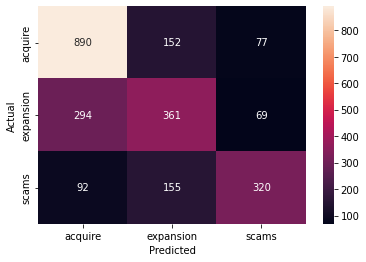

In [ ]:
conf_mat_RF_test = confusion_matrix(labels_test, y_pred_RF_test)
sns.heatmap(conf_mat_RF_test, annot=True, fmt='d',
            xticklabels=label_id_df_test.label.values, yticklabels=label_id_df_test.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
print(metrics.classification_report(labels_test, y_pred_RF_test, digits=3, target_names=label_id_df_test.label.values))

              precision    recall  f1-score   support

     acquire      0.697     0.795     0.743      1119
   expansion      0.540     0.499     0.519       724
       scams      0.687     0.564     0.620       567

    accuracy                          0.652      2410
   macro avg      0.642     0.619     0.627      2410
weighted avg      0.648     0.652     0.647      2410



In [ ]:
df_final2_test_RF = df_final2_test

In [ ]:
df_final2_test_RF['pred_labelid'] = y_pred_RF_test

In [ ]:
df_final2_test_RF[(df_final2_test_RF['labelid']==0) & (df_final2_test_RF['pred_labelid']==0)]

,file_sentences,label,labelid,pred_labelid
74,"the scope, nature, impact or timing of acquisi...",acquire,0,0
75,As part of our strategy to realign our busines...,acquire,0,0
86,As part of our strategy to realign our busines...,acquire,0,0
90,As part of our strategy to realign our busines...,acquire,0,0
125,certain purchase accounting adjustments that w...,acquire,0,0
...,...,...,...,...
6930,any significant disruption in our operations o...,acquire,0,0
6943,The Company expects to make investments over t...,acquire,0,0
6948,Synergy Benefits The failure to realize the an...,acquire,0,0
6950,The software industry is characterized by rapi...,acquire,0,0


In [ ]:
df_final2_test_RF[(df_final2_test_RF['labelid']==1) & (df_final2_test_RF['pred_labelid']==1)]

,file_sentences,label,labelid,pred_labelid
49,"During 2017, we continued to expand our existing portfolio of drinks and further develop our distribution markets. During 2017, we introduced the following products:",expansion,1,1
54,"During 2019, we continued to expand our existing portfolio of drinks and further develop our distribution markets. During 2019, we introduced the following products:",expansion,1,1
55,"During 2018, we continued to expand our existing portfolio of drinks and further develop our distribution markets. During 2018, we introduced the following products:",expansion,1,1
59,"the development and deployment of new products and technologies including our cloud-based user interface, Spectrum Guide;",expansion,1,1
62,"Refer to the section titled ""New Product Offerings"" for solutions added to our platform offerings in 2019.",expansion,1,1
...,...,...,...,...
3647,Our future success and earnings growth depend in part on our ability to be efficient in the production and manufacture of our products in highly competitive markets. Gaining additional efficiencies may become more,expansion,1,1
3655,centers has led to the organic formation of densely interconnected communities of interest that are difficult for competitors to replicate and deliver added value to our customers.,expansion,1,1
3656,"Our businesses also face significant competition for audience share from various sources. Our Filmed Entertainment segment competes for audiences for its theatrical films with releases by other major film studios, television producers and streaming services as well as with other forms of entertainment and consumer spending",expansion,1,1
3657,"One of the changes we are making to our Marketplace platform is the shift to better understand, organize and leverage the inventory on eBay. This initiative, which we call structured data, will allow us to expand new experiences to more traffic and drive data quality.",expansion,1,1


In [ ]:
df_final2_test_RF[(df_final2_test_RF['labelid']==2) & (df_final2_test_RF['pred_labelid']==2)]

,file_sentences,label,labelid,pred_labelid
25,"civil laws restricting illegal kickbacks and conflicts of interest in connection with an ERISA plan, the federal Stark Law, and various state anti-kickback restrictions.",scams,2,2
62,"We may be involved in legal proceedings, including IP, securities litigation, and employee-related claims.",scams,2,2
63,Our Businesses Are Subject To The Risk Of Increased Litigation.,scams,2,2
81,We are subject to payments-related fraud risks.,scams,2,2
82,"We have been and are a party, from time to time, to various litigation claims and legal proceedings, including, but not limited to, intellectual property, fraud, unfair business practices, false advertising, product liability, breach of contract claims, claims from prior distributors, labor and employment matters, personal injury matters, consumer class actions, securities actions and shareholder derivative actions.",scams,2,2
...,...,...,...,...
4469,"We are subject to numerous federal, state and local laws and regulations, many of which are complex, frequently revised and subject to varying interpretations. These include laws governing employment and labor, wage and hour, environmental matters, proper handling and disposal of hazardous materials and waste, healthcare, data privacy, cybersecurity, the pricing and sale of goods, import and export compliance, transportation and logistics, consumer protection and advertising, among others. These laws may differ substantially in the areas where we operate. Although we have implemented policies and procedures to help ensure compliance with these laws, there can be no certainty that our employees and third parties with whom we do business will not take actions in violation of our policies or applicable laws. If we fail to comply with these laws, rules and regulations, or the manner in which they are interpreted or applied, we may be subject to governmental enforcement action or private litigation resulting in monetary penalties, reputational harm and increased costs of regulatory compliance. Any changes in regulations, the imposition of additional regulations, or the enactment of any new legislation could have an adverse impact, directly or indirectly, on our financial condition and results of operations. We may also be subject to investigations or audits by governmental authorities and regulatory agencies as a result of enforcing existing laws and regulations or changes in enforcement priorities, which can occur in the ordinary course of business or may result from increased scrutiny from a particular agency or toward a particular industry.",scams,2,2
4470,"taxation, liability for third-party activities and the quality of products and services. Furthermore, the growth and development of online commerce may prompt calls for more stringent consumer protection laws and more aggressive enforcement efforts, which may impose additional burdens on online businesses generally.",scams,2,2
4471,"We cannot be sure that our pending patent applications will result in the issuance of patents, that patents issued to or licensed by us in the past or in the future will not be challenged or circumvented by competitors, or that these patents will be",scams,2,2
4498,"For example, in the 944 Investigation, the USITC issued a limited exclusion order barring entry into the United States of our network devices (including our 7000 Series of switches), related software, and components thereof that infringe one or more of the claims of the 537, 592, and 145 patents specified above and a cease and desist order restricting our activities with respect to such imported products. In the 945 Investigation, the USITC issued a limited exclusion order barring entry into the United States of our network devices, related software, and components thereof that infringe one or more of the claims of the 577 and 668 patents specified above and a cease and desist order restricting our activities with respect to such imported products.",scams

In [ ]:
df_final2_test_RF[(df_final2_test_RF['labelid']==0) & (df_final2_test_RF['pred_labelid']==1)]

,file_sentences,label,labelid,pred_labelid
327,"We believe that our customers are increasingly looking for strong, long-term relationships with a few key suppliers that help them improve product performance, reduce costs, or support new product development. To satisfy these growing customer requirements, our competitors have been consolidating within product lines through mergers and acquisitions. We may also need to invest and spend more on research and development and marketing costs to strengthen existing customer relationships, as well as attract new customers.",acquire,0,1
1673,"the budgeting, sales and implementation cycles, purchasing practices and buying patterns of end customers, including large end customers who may receive lower pricing terms due to volume discounts and who may or may not make large bulk purchases in certain quarters or who may elect to re-assign allocations to multiple vendors based upon specific network roles or projects;",acquire,0,1
1780,"the budgeting cycles, purchasing practices and buying patterns of end customers, including large end customers who may receive lower pricing terms due to volume discounts and who may or may not make large bulk purchases in certain quarters or who may elect to re-assign allocations to multiple vendors based upon specific network roles or projects;",acquire,0,1
1915,See Note P of the Notes to Consolidated Financial Statements in this Annual Report for additional discussion of unconsolidated affiliates.,acquire,0,1
2000,"As part of our business strategy, we may make investments in complementary companies, products or technologies which could involve licenses, additional channels of distribution, discount pricing or investments in",acquire,0,1
...,...,...,...,...
6913,"rapid diagnostics lateral flow testing products in the area of infectious diseases, including respiratory viruses such as SARS-CoV-2 and influenza, HIV, hepatitis, and tropical diseases such as malaria and dengue fever; molecular point-of-care testing for HIV, including the m-PIMA HIV-1/2 Viral Load Test, and for SARS-CoV-2 and influenza A & B, RSV and strep A, including the ID NOW rapid molecular system; cardiometabolic testing, including Afinion and Cholestech platforms and tests; a toxicology business for drug and alcohol testing; and remote patient monitoring and consumer self-testing; and[DATA_TABLE_REMOVED]",acquire,0,1
6916,"Our ability to execute appropriate decisions to discontinue, write-down or reduce the funding of any of our research and development projects, including projects from in-process research and development, in our growth adjacencies or otherwise,",acquire,0,1
6918,"eCommerce and group buying websites: Traditional consumer eCommerce platforms, including Amazon and Alibaba, and group buying websites have periodically undertaken efforts to expand their local offerings into the travel market. For example, traditional consumer eCommerce and group buying websites may add hotel offers or other travel services to their sites. To the extent our travelers uses these websites, these websites may create additional competition and could negatively affect our businesses.",acquire,0,1
6943,The Company expects to make investments over the next five years to enhance competitiveness in the Companys Polyurethanes & Construction Chemicals and Industrial Solutions businesses. The investments will include alkoxylation capacity expansions and finishing capabilities; investments to support growth in polyurethane systems; and efficiency improvements around the world.,acquire,0,1


In [ ]:
df_final2_test_RF[(df_final2_test_RF['labelid']==1) & (df_final2_test_RF['pred_labelid']==0)]

,file_sentences,label,labelid,pred_labelid
251,"of interactive entertainment software, our own publishing operations, and manufacturers of interactive entertainment hardware.",expansion,1,0
505,"Making it affordable: We build on our leading, differentiated position to lower the total cost of care.",expansion,1,0
516,The following is a summary of significant developments during 2017 and certain 2018 plans for EOG's United States operations.,expansion,1,0
585,"In 2020, we achieved significant milestones on our strategic objectives, including:",expansion,1,0
649,delays or changes in the deployment of next generation wireless technologies; and,expansion,1,0
...,...,...,...,...
3519,See Urology and Womens Health within Item 7. Managements Discussion and Analysis of Financial Condition and Results of Operations of this Annual Report for additional information.,expansion,1,0
3555,"manufacture and market new product lines and extensions successfully and in a timely manner, our business, results of operations and financial condition will be adversely affected. We have experienced product launch delays in the past, and may do so in the future. We cannot assure you that our product and process development efforts will be successful or that new products we introduce will achieve market acceptance. Failure to launch successful new products or improvements to existing products may cause our products to become obsolete, which could harm our business, results of operations and financial condition.",expansion,1,0
3593,"successful or that new products we introduce will achieve market acceptance. Failure to launch successful new products or improvements to existing products may cause our products to become obsolete, which could harm our business, results of operations and financial condition.",expansion,1,0
3596,"During fiscal 2014, we terminated a contract with KPIT (formerly known as Sparta Consulting, Inc.), whereby KPIT was engaged to design and implement an SAP-based replacement for our existing business operating software that, among other things, would address our international expansion needs. Following a review of KPITs work performed to date, and an assessment of the cost to complete, deployment risk, and other factors, we ceased development of KPITs software and internally developed a proprietary solution in its place. The ongoing design, development, and implementation of our enterprise operating systems carry certain risks, including the risk of significant design or deployment errors causing disruptions, delays or deficiencies, which may make our website and services unavailable. This type of interruption could prevent us from processing vehicles for our sellers and may prevent us from selling vehicles through our Internet bidding platform, VB3, which would adversely affect our consolidated results of operations and financial position. In addition, the transition to our new internally developed proprietary system will require us to commit substantial financial, operational and technical resources before the volume of business increases, without assurance that the volume of business will increase. We began using our new internally developed proprietary system with our expansion into Spain and India in fiscal 2016 and Germany in fiscal 2017.",expansion,1,0


Logistic regression Prediction on Test

In [ ]:
y_pred_LR_test = model_LR.predict(features_test)

Text(0.5, 15.0, 'Predicted')

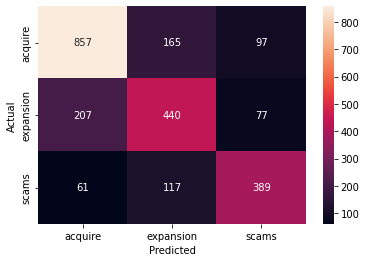

In [ ]:
conf_mat_LR_test = confusion_matrix(labels_test, y_pred_LR_test)
sns.heatmap(conf_mat_LR_test, annot=True, fmt='d',
            xticklabels=label_id_df_test.label.values, yticklabels=label_id_df_test.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
print(metrics.classification_report(labels_test, y_pred_LR_test, digits=3, target_names=label_id_df_test.label.values))

              precision    recall  f1-score   support

     acquire      0.762     0.766     0.764      1119
   expansion      0.609     0.608     0.609       724
       scams      0.691     0.686     0.688       567

    accuracy                          0.700      2410
   macro avg      0.687     0.687     0.687      2410
weighted avg      0.699     0.700     0.699      2410



In [ ]:
df_final2_test_LR = df_final2_test

In [ ]:
df_final2_test_LR['pred_labelid'] = y_pred_LR_test

In [ ]:
df_final2_test_LR[(df_final2_test_LR['labelid']==0) & (df_final2_test_LR['pred_labelid']==0)]

,file_sentences,label,labelid,pred_labelid
74,"the scope, nature, impact or timing of acquisition and divestiture activity, including among other things integration of acquired businesses into existing businesses and realization of synergies and opportunities for growth and innovation and incurrence of related costs;",acquire,0,0
75,"As part of our strategy to realign our business portfolio, we completed several acquisitions in 2015, 2014 and 2013 and may pursue additional acquisitions in the future. Our integration of acquired businesses requires significant efforts, including corporate restructuring, the coordination of information technologies, research and development, sales and marketing, operations, supply chain, manufacturing, quality systems and finance. These efforts result in additional expenses and involve significant management time. Some of the factors that could affect the success of our acquisitions include, among others, our ability to execute our business plan for the acquired companies, the strength of the acquired technology, results of clinical trials, regulatory approvals and",acquire,0,0
86,"As part of our strategy to realign our business portfolio, we have completed multiple acquisitions over the past three years and may pursue additional acquisitions in the future. Our integration of acquired businesses requires significant efforts, including corporate restructuring and the coordination of information technologies, research and development, sales and marketing, operations, regulatory, supply chain, manufacturing, quality systems and finance. These efforts result in additional expenses and involve significant management time. Some of the factors that could affect the success of our acquisitions include, among others, the effectiveness of our due diligence process, our ability to execute our business plan for the acquired companies, the strength of the acquired technology, results of clinical trials, regulatory approvals and reimbursement levels of the acquired products and related procedures, the continued performance of critical transition services, our ability to adequately fund acquired in-process",acquire,0,0
90,"As part of our strategy to realign our business portfolio, we completed several acquisitions in 2017, 2016 and 2015 and may pursue additional acquisitions in the future. Our integration of acquired businesses requires significant efforts, including corporate restructuring, the coordination of information technologies, research and development, sales and marketing, operations, regulatory, supply chain, manufacturing, quality systems and finance. These efforts result in additional expenses and involve significant management time. Some of the factors that could affect the success of our acquisitions include, among others, the effectiveness of our due diligence process, our ability to execute our business plan for the acquired companies, the strength of the acquired technology, results of clinical trials, regulatory approvals and reimbursement levels of the acquired products and related procedures,",acquire,0,0
125,"certain purchase accounting adjustments that we expect will be recorded in our financial statements in connection with any merger, acquisition or strategic partnership;",acquire,0,0
...,...,...,...,...
6900,"As the speed, frequency, volume, interconnectivity and complexity of transactions continue to increase, it becomes more challenging to effectively maintain and upgrade JPMorgan Chases operational systems and infrastructure, especially due to the heightened risks that:",acquire,0,0
6917,"unanticipated issues in integrating information technology, communications and other systems; and",acquire,0,0
6919,Changes to visa and immigration requirements or border control policies.,acquire,0,0
6948,Synergy Benefits The failure to realize the anticipated benefits of the acquisition of Bemis.,acquire,0,0


In [ ]:
df_final2_test_LR[(df_final2_test_LR['labelid']==1) & (df_final2_test_LR['pred_labelid']==1)]

,file_sentences,label,labelid,pred_labelid
49,"During 2017, we continued to expand our existi...",expansion,1,1
54,"During 2019, we continued to expand our existi...",expansion,1,1
55,"During 2018, we continued to expand our existi...",expansion,1,1
59,the development and deployment of new products...,expansion,1,1
62,"Refer to the section titled ""New Product Offer...",expansion,1,1
...,...,...,...,...
3639,Applications and social media websites. Applic...,expansion,1,1
3640,relocation expenses relating to the spectrumre...,expansion,1,1
3641,Component changes in AUM by product type and i...,expansion,1,1
3645,We provide a large and unique selection of inv...,expansion,1,1


In [ ]:
df_final2_test_LR[(df_final2_test_LR['labelid']==2) & (df_final2_test_LR['pred_labelid']==2)]

,file_sentences,label,labelid,pred_labelid
25,"civil laws restricting illegal kickbacks and conflicts of interest in connection with an ERISA plan, the federal Stark Law, and various state anti-kickback restrictions.",scams,2,2
62,"We may be involved in legal proceedings, including IP, securities litigation, and employee-related claims.",scams,2,2
63,Our Businesses Are Subject To The Risk Of Increased Litigation.,scams,2,2
81,We are subject to payments-related fraud risks.,scams,2,2
82,"We have been and are a party, from time to time, to various litigation claims and legal proceedings, including, but not limited to, intellectual property, fraud, unfair business practices, false advertising, product liability, breach of contract claims, claims from prior distributors, labor and employment matters, personal injury matters, consumer class actions, securities actions and shareholder derivative actions.",scams,2,2
...,...,...,...,...
4469,"We are subject to numerous federal, state and local laws and regulations, many of which are complex, frequently revised and subject to varying interpretations. These include laws governing employment and labor, wage and hour, environmental matters, proper handling and disposal of hazardous materials and waste, healthcare, data privacy, cybersecurity, the pricing and sale of goods, import and export compliance, transportation and logistics, consumer protection and advertising, among others. These laws may differ substantially in the areas where we operate. Although we have implemented policies and procedures to help ensure compliance with these laws, there can be no certainty that our employees and third parties with whom we do business will not take actions in violation of our policies or applicable laws. If we fail to comply with these laws, rules and regulations, or the manner in which they are interpreted or applied, we may be subject to governmental enforcement action or private litigation resulting in monetary penalties, reputational harm and increased costs of regulatory compliance. Any changes in regulations, the imposition of additional regulations, or the enactment of any new legislation could have an adverse impact, directly or indirectly, on our financial condition and results of operations. We may also be subject to investigations or audits by governmental authorities and regulatory agencies as a result of enforcing existing laws and regulations or changes in enforcement priorities, which can occur in the ordinary course of business or may result from increased scrutiny from a particular agency or toward a particular industry.",scams,2,2
4471,"We cannot be sure that our pending patent applications will result in the issuance of patents, that patents issued to or licensed by us in the past or in the future will not be challenged or circumvented by competitors, or that these patents will be",scams,2,2
4498,"For example, in the 944 Investigation, the USITC issued a limited exclusion order barring entry into the United States of our network devices (including our 7000 Series of switches), related software, and components thereof that infringe one or more of the claims of the 537, 592, and 145 patents specified above and a cease and desist order restricting our activities with respect to such imported products. In the 945 Investigation, the USITC issued a limited exclusion order barring entry into the United States of our network devices, related software, and components thereof that infringe one or more of the claims of the 577 and 668 patents specified above and a cease and desist order restricting our activities with respect to such imported products.",scams,2,2
4510,"Our Health Services business owns and has registered certain trade and service marks with the United States Patent and Trademark Office, including but not limited to the following marks: EXPRESS SCRIPTS, MEDCO, ACCREDO, CURASCRIPTSD, EVICORE HEALTHCARE, FREEDOM FERTILITY PHARMACY, RATIONALMED, SCREENRX, EXPRESSALLIANCE, TH

In [ ]:
df_final2_test_LR[(df_final2_test_LR['labelid']==0) & (df_final2_test_LR['pred_labelid']==1)]

,file_sentences,label,labelid,pred_labelid
327,"We believe that our customers are increasingly looking for strong, long-term relationships with a few key suppliers that help them improve product performance, reduce costs, or support new product development. To satisfy these growing customer requirements, our competitors have been consolidating within product lines through mergers and acquisitions. We may also need to invest and spend more on research and development and marketing costs to strengthen existing customer relationships, as well as attract new customers.",acquire,0,1
1557,"During the years ended December 31, 2017, 2016 and 2015 the Company completed various acquisitions to expand its customer base and accelerate the development of new and innovative products to the marketplace while lowering design and engineering costs for customers. The acquisitions were not individually significant. The combined purchase prices of the acquisitions purchased during the years ended December 31, 2017, 2016 and 2015 were approximately $67.0 million, $10.3 million and $49.7 million, respectively. The 2017 technology acquisitions are further described in the table below:",acquire,0,1
1673,"the budgeting, sales and implementation cycles, purchasing practices and buying patterns of end customers, including large end customers who may receive lower pricing terms due to volume discounts and who may or may not make large bulk purchases in certain quarters or who may elect to re-assign allocations to multiple vendors based upon specific network roles or projects;",acquire,0,1
1780,"the budgeting cycles, purchasing practices and buying patterns of end customers, including large end customers who may receive lower pricing terms due to volume discounts and who may or may not make large bulk purchases in certain quarters or who may elect to re-assign allocations to multiple vendors based upon specific network roles or projects;",acquire,0,1
1955,"During the twelve months ended December 31, 2016 and 2015, the Company completed various acquisitions to accelerate the development of new and innovative products to the marketplace while lowering design and engineering costs for customers. The acquisitions were not individually significant. The combined purchase prices of the acquisitions were approximately $10.3 million and $49.7 million for the years ended December 31, 2016 and 2015, respectively.",acquire,0,1
...,...,...,...,...
6918,"eCommerce and group buying websites: Traditional consumer eCommerce platforms, including Amazon and Alibaba, and group buying websites have periodically undertaken efforts to expand their local offerings into the travel market. For example, traditional consumer eCommerce and group buying websites may add hotel offers or other travel services to their sites. To the extent our travelers uses these websites, these websites may create additional competition and could negatively affect our businesses.",acquire,0,1
6943,The Company expects to make investments over the next five years to enhance competitiveness in the Companys Polyurethanes & Construction Chemicals and Industrial Solutions businesses. The investments will include alkoxylation capacity expansions and finishing capabilities; investments to support growth in polyurethane systems; and efficiency improvements around the world.,acquire,0,1
6947,integration and optimization of the entire production system over the life of the field by leveraging flow control expertise and process technologies with petrotechnical expertise and reservoir and production technologies.,acquire,0,1
6950,"The software industry is characterized by rapid technological changes as well as changes in customer requirements and preferences. In recent years, the industry has undergone a transition from developing and selling perpetual licenses and on-premises products to subscriptions and cloud-enabled technologies. Customers are also reconsidering how they purchase software products, which requir

In [ ]:
df_final2_test_LR[(df_final2_test_LR['labelid']==1) & (df_final2_test_LR['pred_labelid']==0)]

,file_sentences,label,labelid,pred_labelid
390,"In 2019, we achieved significant milestones on our strategic objectives, including:",expansion,1,0
505,"Making it affordable: We build on our leading, differentiated position to lower the total cost of care.",expansion,1,0
516,The following is a summary of significant developments during 2017 and certain 2018 plans for EOG's United States operations.,expansion,1,0
585,"In 2020, we achieved significant milestones on our strategic objectives, including:",expansion,1,0
807,"further delays to our construction projects, including at our renewables projects, and the timing of the completion of renewables projects;",expansion,1,0
921,We will need to launch certain branding or rebranding initiatives in connection with the integration that may take a significant amount of time and involve substantial costs and that may not be favorably received by our guests.,expansion,1,0
1180,completing the conversion of analog systems to all-digital for the systems to be acquired from TWC and Bright House;,expansion,1,0
1218,"continuing strong demand for top-tier developers resources, combined with the recognition they receive in connection with their work, may cause developers who worked for us in the past either to work for a competitor in the future or to renegotiate agreements with us on terms less favorable to us;",expansion,1,0
1328,successfully marketing space on the Verizon Assets;,expansion,1,0
1598,"Increase the occupancy of our existing communications real estate portfolio to support global connectivity. We believe that our highest incremental returns will be achieved by leasing additional space on our existing communications sites. Increasing demand for wireless services in our served markets has resulted in significant capital spending by major wireless carriers and other connectivity providers. As a result, we anticipate growing demand for our communications sites because they are attractively located and typically have capacity available for additional tenants and equipment. In the United States, incremental carrier network activity is being driven by 4G network densification initiatives as well as the early stages of multiple concurrent 5G network deployments. In our international markets, carriers are increasingly deploying more advanced network technologies such as 4G and, in the case of our international markets with more mature network technology, 5G, while continuing to selectively augment legacy networks. We believe that the majority of our towers have capacity for additional tenants and that substantially all of our towers that are currently at or near full structural capacity can be upgraded or augmented to meet future tenant demand with relatively modest capital investment. Therefore, we will continue to target our sales and marketing activities to increase the utilization and return on investment of our existing communications sites.",expansion,1,0


In [ ]:
df_final2_test_LR[(df_final2_test_LR['labelid']==0) & (df_final2_test_LR['pred_labelid']==2)]

,file_sentences,label,labelid,pred_labelid
1915,See Note P of the Notes to Consolidated Financial Statements in this Annual Report for additional discussion of unconsolidated affiliates.,acquire,0,2
2142,"The EU is also currently considering or executing upon significant revisions to laws covering: depositary activities; credit rating activities; resolution of banks, investment firms and market infrastructures; anti-money-laundering controls; data security and privacy; and corporate governance in financial firms, together with implementation in the EU of the Basel III capital standards.",acquire,0,2
2177,"terms that are not economically feasible, to re-engineer our products, to discontinue the sale of our products if re-engineering could not be accomplished on a timely basis or to make generally available, in source code form, our proprietary code, any of which could adversely affect our business, financial condition, results of operations and prospects.",acquire,0,2
2234,"The EU is also currently considering or implementing significant revisions to laws covering: depositary activities; credit rating activities; resolution of banks, investment firms and market infrastructures; anti-money-laundering controls; data security and privacy; corporate governance in financial firms; and implementation in the EU of the Basel III capital and liquidity standards.",acquire,0,2
2589,expropriation or governmental regulation restricting foreign ownership or requiring reversion or divestiture;,acquire,0,2
2613,"The EU is also currently considering or implementing significant revisions to laws covering depositary activities; credit-rating activities; resolution of banks, investment firms and market infrastructures; anti-money laundering controls; data security and privacy; corporate governance in financial firms; and implementation in the EU of the Basel III capital and liquidity standards, including the introduction of",acquire,0,2
3211,"increased reliance on third parties involved with processing in-store payments, including independent software providers, electronic point of sale providers, hardware providers (such as cash register and pin-pad providers), payment processors and banks that enable in-store transactions; and",acquire,0,2
3408,national negotiated contracts and bulk purchases where possible;,acquire,0,2
3439,"our due diligence process may fail to identify significant issues with the acquired companys products, financial disclosures, accounting practices, legal, tax and other contingencies, compliance with local laws and regulations (and interpretations thereof) in multiple international jurisdictions, as well as compliance with U.S. laws and regulations;",acquire,0,2
3528,"For additional information regarding competition, see Item 1A. Risk Factors Our businesses operate in industries that are highly competitive and swiftly consolidating.",acquire,0,2


MultinomialNB Prediction on Test Dataset

In [ ]:
y_pred_MNB_test = model_MNB.predict(features_test)

Text(0.5, 15.0, 'Predicted')

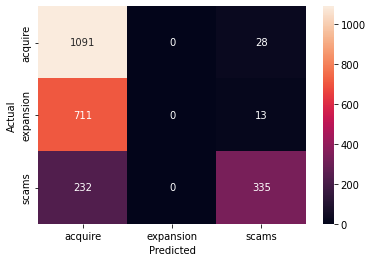

In [ ]:
conf_mat_MNB_test = confusion_matrix(labels_test, y_pred_MNB_test)
# conf_mat
sns.heatmap(conf_mat_MNB_test, annot=True, fmt='d',
            xticklabels=label_id_df_test.label.values, yticklabels=label_id_df_test.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
print(metrics.classification_report(labels_test, y_pred_MNB_test, digits=3, target_names=label_id_df_test.label.values))

              precision    recall  f1-score   support

     acquire      0.536     0.975     0.692      1119
   expansion      0.000     0.000     0.000       724
       scams      0.891     0.591     0.710       567

    accuracy                          0.592      2410
   macro avg      0.476     0.522     0.468      2410
weighted avg      0.459     0.592     0.488      2410



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df_final2_test_MNB = df_final2_test

In [ ]:
df_final2_test_MNB['pred_labelid'] = y_pred_MNB_test

In [ ]:
df_final2_test_MNB[(df_final2_test_MNB['label']=='acquire') & (df_final2_test_MNB['labelid'] != df_final2_test_MNB['pred_labelid'])].head()

,file_sentences,label,labelid,pred_labelid
1786,changes in or interpretations of laws and regu...,acquire,0,2
1812,changes in or interpretations of laws and regu...,acquire,0,2
2142,The EU is also currently considering or execut...,acquire,0,2
2234,The EU is also currently considering or implem...,acquire,0,2
2613,The EU is also currently considering or implem...,acquire,0,2


generate the test datasets with metadata

In [ ]:
df_final2_test_MNB.head(1)

,file_sentences,label,labelid,pred_labelid
74,"the scope, nature, impact or timing of acquisi...",acquire,0,0


In [ ]:
df_final2_test_LR.head(1)

,file_sentences,label,labelid,pred_labelid
74,"the scope, nature, impact or timing of acquisi...",acquire,0,0


In [ ]:
df_final2_test_SVC.head(1)

,file_sentences,label,labelid,pred_labelid
74,"the scope, nature, impact or timing of acquisi...",acquire,0,0


In [ ]:
df_final2_test_RF.head(1)

,file_sentences,label,labelid,pred_labelid
74,"the scope, nature, impact or timing of acquisi...",acquire,0,0


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving acquire_relevant_sents_test.csv to acquire_relevant_sents_test.csv
Saving expansion_relevant_sents_test.csv to expansion_relevant_sents_test.csv
Saving scams_relevant_sents_test.csv to scams_relevant_sents_test.csv


In [ ]:
#Read the Data
acquisition_sentences_test_meta = pd.read_csv("acquire_relevant_sents_test.csv")
expansion_sentences_test_meta = pd.read_csv("expansion_relevant_sents_test.csv")
governance_sentences_test_meta = pd.read_csv("scams_relevant_sents_test.csv")

In [ ]:
#Replacing Column name by Position
acquisition_sentences_test_meta.rename(columns={ acquisition_sentences_test_meta.columns[0]: "id" }, inplace = True)
acquisition_sentences_test_meta = acquisition_sentences_test_meta.drop(['id'], axis=1)
#Replacing Column name by Position
expansion_sentences_test_meta.rename(columns={ expansion_sentences_test_meta.columns[0]: "id" }, inplace = True)
expansion_sentences_test_meta = expansion_sentences_test_meta.drop(['id'], axis=1)
#Replacing Column name by Position
governance_sentences_test_meta.rename(columns={ governance_sentences_test_meta.columns[0]: "id" }, inplace = True)
governance_sentences_test_meta = governance_sentences_test_meta.drop(['id'], axis=1)

print('acquisition_sentences_test: ', len(acquisition_sentences_test_meta))
print('expansion_sentences_test: ', len(expansion_sentences_test_meta))
print('governance_sentences_test: ', len(governance_sentences_test_meta))

acquisition_sentences_test:  6953
expansion_sentences_test:  3664
governance_sentences_test:  4520


In [ ]:
acquisition_sentences_test_meta.drop_duplicates(keep=False,inplace=True)
acquisition_sentences_unique_test_meta = acquisition_sentences_test_meta[['file_sentences', 'label']].drop_duplicates(keep=False)
expansion_sentences_test_meta.drop_duplicates(keep=False,inplace=True)
expansion_sentences_unique_test_meta = expansion_sentences_test_meta[['file_sentences', 'label']].drop_duplicates(keep=False)
governance_sentences_test_meta.drop_duplicates(keep=False,inplace=True)
governance_sentences_unique_test_meta = governance_sentences_test_meta[['file_sentences', 'label']].drop_duplicates(keep=False)

In [ ]:
def word_count(string):
    return(len(string.strip().split(" ")))

In [ ]:
acquisition_sentences_unique_test_meta['word_count'] = acquisition_sentences_unique_test_meta.apply(lambda row : word_count(row['file_sentences']), axis = 1)
acquisition_sentences_unique_test_meta = acquisition_sentences_unique_test_meta[(acquisition_sentences_unique_test_meta['word_count']>= 6) & (acquisition_sentences_unique_test_meta['word_count']<= 400)]

In [ ]:
governance_sentences_unique_test_meta['word_count'] = governance_sentences_unique_test_meta.apply(lambda row : word_count(row['file_sentences']), axis = 1)
governance_sentences_unique_test_meta = governance_sentences_unique_test_meta[(governance_sentences_unique_test_meta['word_count']>= 6) & (governance_sentences_unique_test_meta['word_count']<= 400)]

In [ ]:
expansion_sentences_unique_test_meta['word_count'] = expansion_sentences_unique_test_meta.apply(lambda row : word_count(row['file_sentences']), axis = 1)
expansion_sentences_unique_test_meta = expansion_sentences_unique_test_meta[(expansion_sentences_unique_test_meta['word_count']>= 6) & (expansion_sentences_unique_test_meta['word_count']<= 600)]

In [ ]:
expansion_sentences_unique_test_meta1 = pd.merge(expansion_sentences_unique_test_meta, expansion_sentences_test_meta, left_index=True, right_index=True, how='left' )

In [ ]:
governance_sentences_unique_test_meta1 = pd.merge(governance_sentences_unique_test_meta, governance_sentences_test_meta, left_index=True, right_index=True, how='left' )

In [ ]:
acquisition_sentences_unique_test_meta1 = pd.merge(acquisition_sentences_unique_test_meta, acquisition_sentences_test_meta, left_index=True, right_index=True, how='left' )

In [ ]:
df_final_test = pd.concat([acquisition_sentences_unique_test_meta1,expansion_sentences_unique_test_meta1,governance_sentences_unique_test_meta1])

In [ ]:
df_final_test.drop(['file_sentences_y', 'label_y'], axis='columns', inplace=True)

In [ ]:
df_final_test['file_sentences'] = df_final_test['file_sentences_x']
df_final_test['label'] = df_final_test['label_x']

df_final_test.drop(['file_sentences_x', 'label_x'], axis='columns', inplace=True)

In [ ]:
df_final_test.head()

,word_count,ticker,sector,cik,filing_type,filing_date,filing_section,cosine_score,file_sentences,label
2,9,CI,Health Care,1739940,10K,20181231,Item1A,0.713980,a large intra- or inter-industry merger or in...,acquire
3,22,AVGO,Information Technology,1730168,10K,20191103,Item1A,0.682984,reorganization or restructuring of our busines...,acquire
6,19,AVGO,Information Technology,1730168,10K,20181104,Item1A,0.673379,reorganization or restructuring of our busines...,acquire
23,16,COF,Financials,927628,10K,20141231,Item1A,0.614400,"cost, deposit, cross-selling and balance sheet...",acquire
39,14,AVGO,Information Technology,1730168,10K,20181104,Item1A,0.604324,"consolidating and integrating corporate, infor...",acquire


In [ ]:
df_final1_test= df_final_test.drop_duplicates(subset=['file_sentences'],keep=False)

In [ ]:
df_final1_test.head()

,word_count,ticker,sector,cik,filing_type,filing_date,filing_section,cosine_score,file_sentences,label
74,37,CARR,Industrials,1783180,10K,20201231,Item1,0.574317,"the scope, nature, impact or timing of acquisi...",acquire
75,107,BSX,Health Care,885725,10K,20151231,Item1A,0.572941,As part of our strategy to realign our busines...,acquire
86,140,BSX,Health Care,885725,10K,20181231,Item1A,0.570325,As part of our strategy to realign our busines...,acquire
90,124,BSX,Health Care,885725,10K,20171231,Item1A,0.568674,As part of our strategy to realign our busines...,acquire
125,23,COF,Financials,927628,10K,20141231,Item1A,0.562186,certain purchase accounting adjustments that w...,acquire


In [ ]:
df_final1_test.to_csv('dataset_market_events_with_meta.csv', index = False)

In [ ]:
import pickle

In [ ]:
filename_MNB = 'MNB_model.sav'
pickle.dump(model_MNB, open(filename_MNB, 'wb'))

In [ ]:
filename_SVC = 'SVC_model.sav'
pickle.dump(model_SVC, open(filename_SVC, 'wb'))

In [ ]:
filename_LR = 'LR_model.sav'
pickle.dump(model_LR, open(filename_LR, 'wb'))

In [ ]:
filename_RF = 'RF_model.sav'
pickle.dump(model_RF, open(filename_RF, 'wb'))

In [ ]:
test_data = pd.read_csv('dataset_market_events_with_meta.csv')

In [ ]:
test_data.head()

,word_count,ticker,sector,cik,filing_type,year,filing_section,cosine_score,file_sentences,tag
0,37,CARR,Industrials,1783180,10K,20201231,Item1,0.574317,"the scope, nature, impact or timing of acquisi...",acquire
1,107,BSX,Health Care,885725,10K,20151231,Item1A,0.572941,As part of our strategy to realign our busines...,acquire
2,140,BSX,Health Care,885725,10K,20181231,Item1A,0.570325,As part of our strategy to realign our busines...,acquire
3,124,BSX,Health Care,885725,10K,20171231,Item1A,0.568674,As part of our strategy to realign our busines...,acquire
4,23,COF,Financials,927628,10K,20141231,Item1A,0.562186,certain purchase accounting adjustments that w...,acquire


In [ ]:
test_data['year'] = test_data['year'].astype('str')


In [ ]:
test_data['year'] = test_data['year'].str[:4]

In [ ]:
test_data.head()

,word_count,ticker,sector,cik,filing_type,year,filing_section,cosine_score,file_sentences,tag
0,37,CARR,Industrials,1783180,10K,2020,Item1,0.574317,"the scope, nature, impact or timing of acquisi...",acquire
1,107,BSX,Health Care,885725,10K,2015,Item1A,0.572941,As part of our strategy to realign our busines...,acquire
2,140,BSX,Health Care,885725,10K,2018,Item1A,0.570325,As part of our strategy to realign our busines...,acquire
3,124,BSX,Health Care,885725,10K,2017,Item1A,0.568674,As part of our strategy to realign our busines...,acquire
4,23,COF,Financials,927628,10K,2014,Item1A,0.562186,certain purchase accounting adjustments that w...,acquire


In [ ]:
test_data.to_csv('dataset_market_events_with_meta.csv', index=False)